In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import joblib
from google.colab import files

# loading the dataset


In [ ]:
df = pd.read_csv('/content/german_credit_data.csv')
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0    

# Data Exploration and Preprocessing

In [ ]:
df['Risk'].value_counts()

,count
Risk,
good,700
bad,300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df=df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


create a table with missing data


In [ ]:
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing ,
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Age,0,0.0,int64
Sex,0,0.0,object
Job,0,0.0,int64
Housing,0,0.0,object
Saving accounts,183,18.3,object
Checking account,394,39.4,object
Credit amount,0,0.0,int64
Duration,0,0.0,int64
Purpose,0,0.0,object
Risk,0,0.0,object


Missing Data Pattern in Training Data

<Axes: >

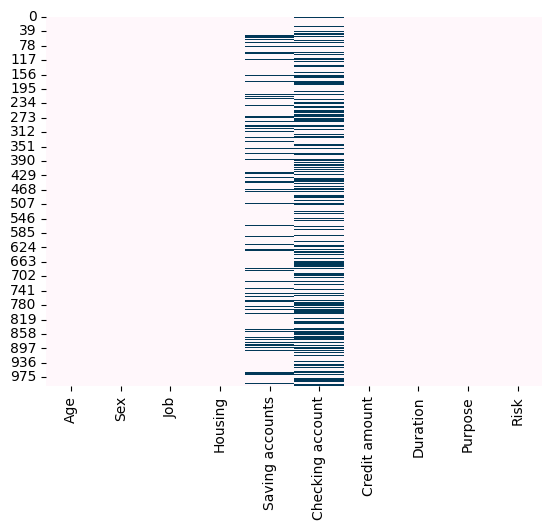

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

saving and checking account has many missing vales which has to be treated

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Checking account,394,0.394
Saving accounts,183,0.183
Age,0,0.000
Sex,0,0.000


In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

Impute categorical variable with Mode

In [ ]:
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']:
    df[column] = df[column].fillna(df[column].mode()[0])

df.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


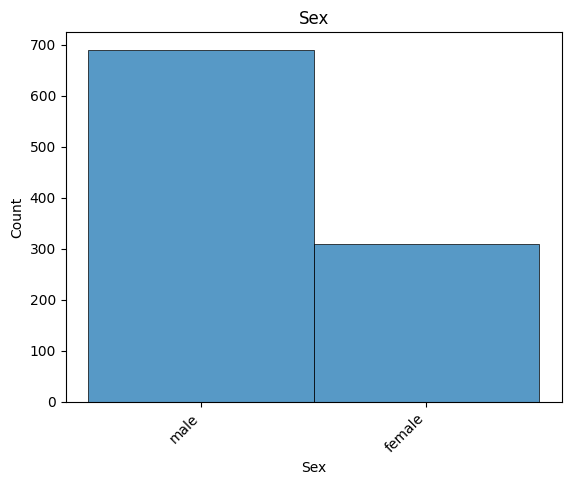

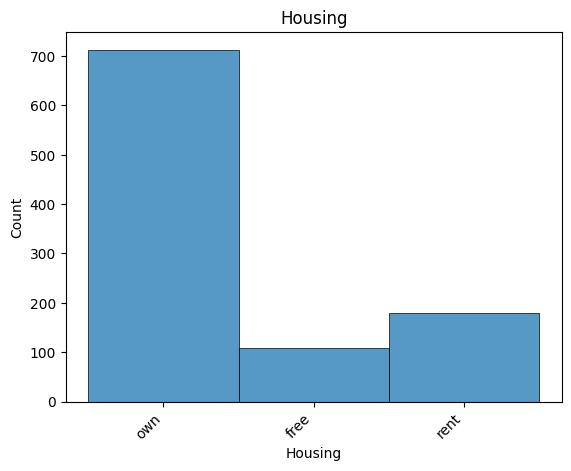

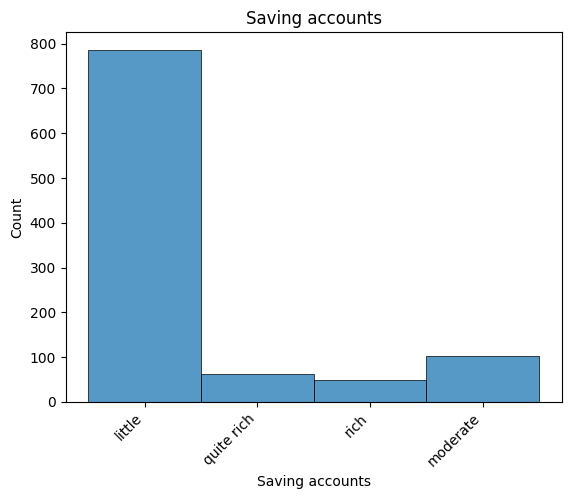

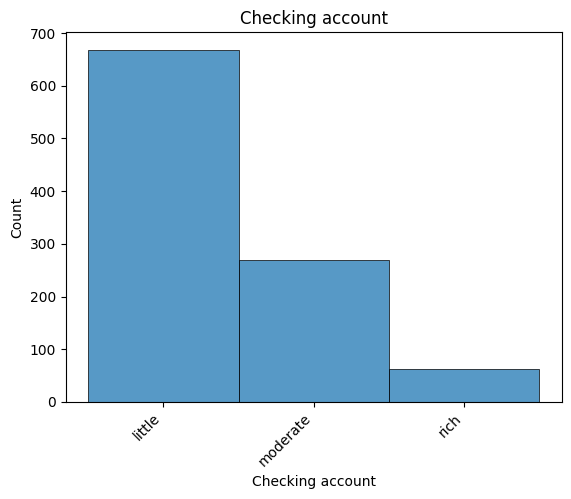

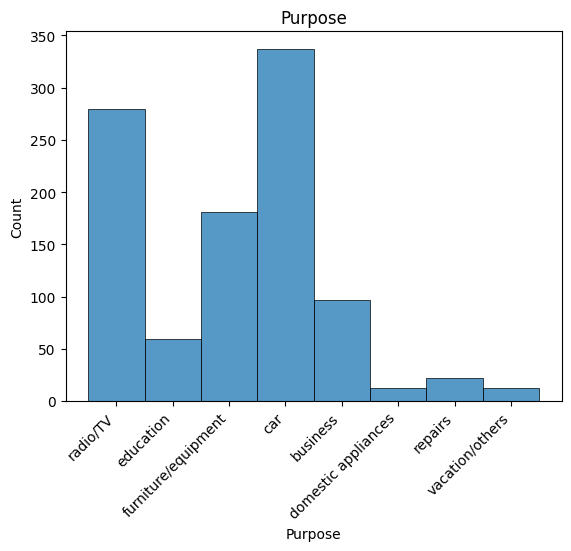

In [ ]:
for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    sns.histplot(x=col, data=df, edgecolor='black', linewidth=0.5)
    plt.title(f'{col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

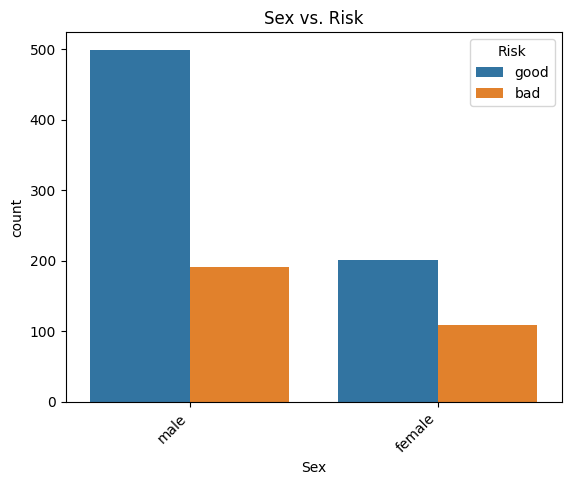

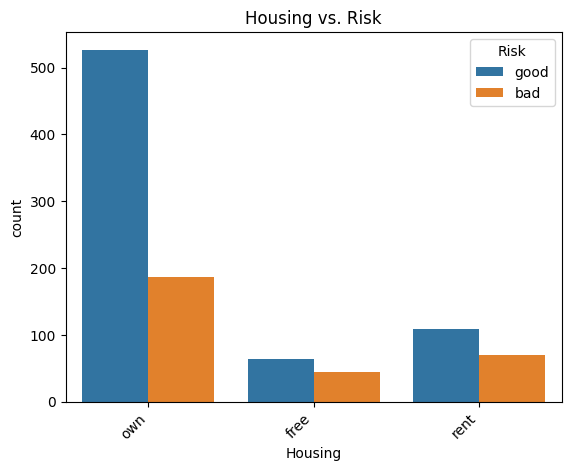

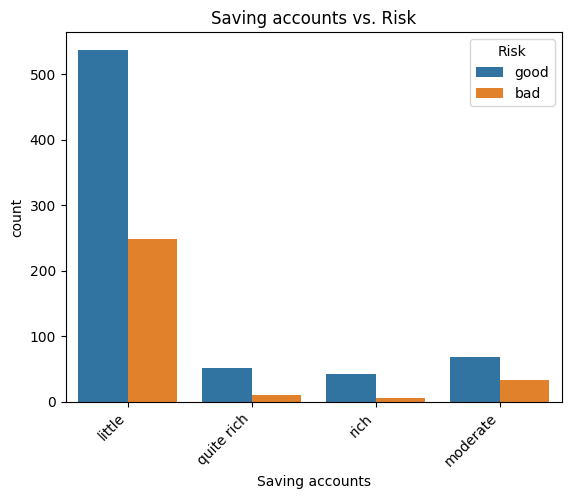

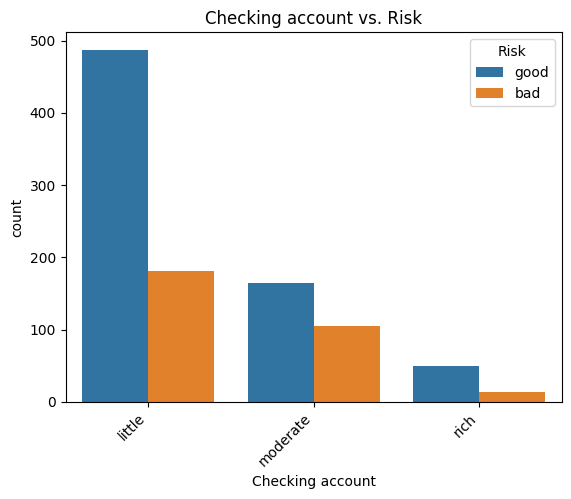

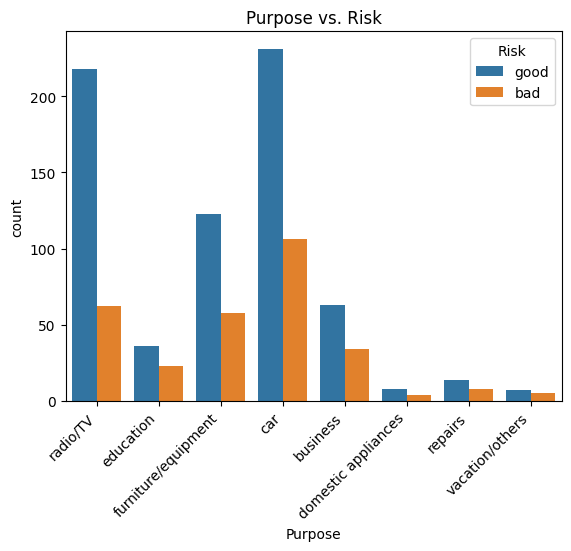

In [ ]:
for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
        sns.countplot(x=col, hue='Risk', data=df)
        plt.title(f'{col} vs. Risk')
        plt.xticks(rotation=45, ha='right')
        plt.show()

Convert categorical features to continuous features with Label Encoding

In [ ]:
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


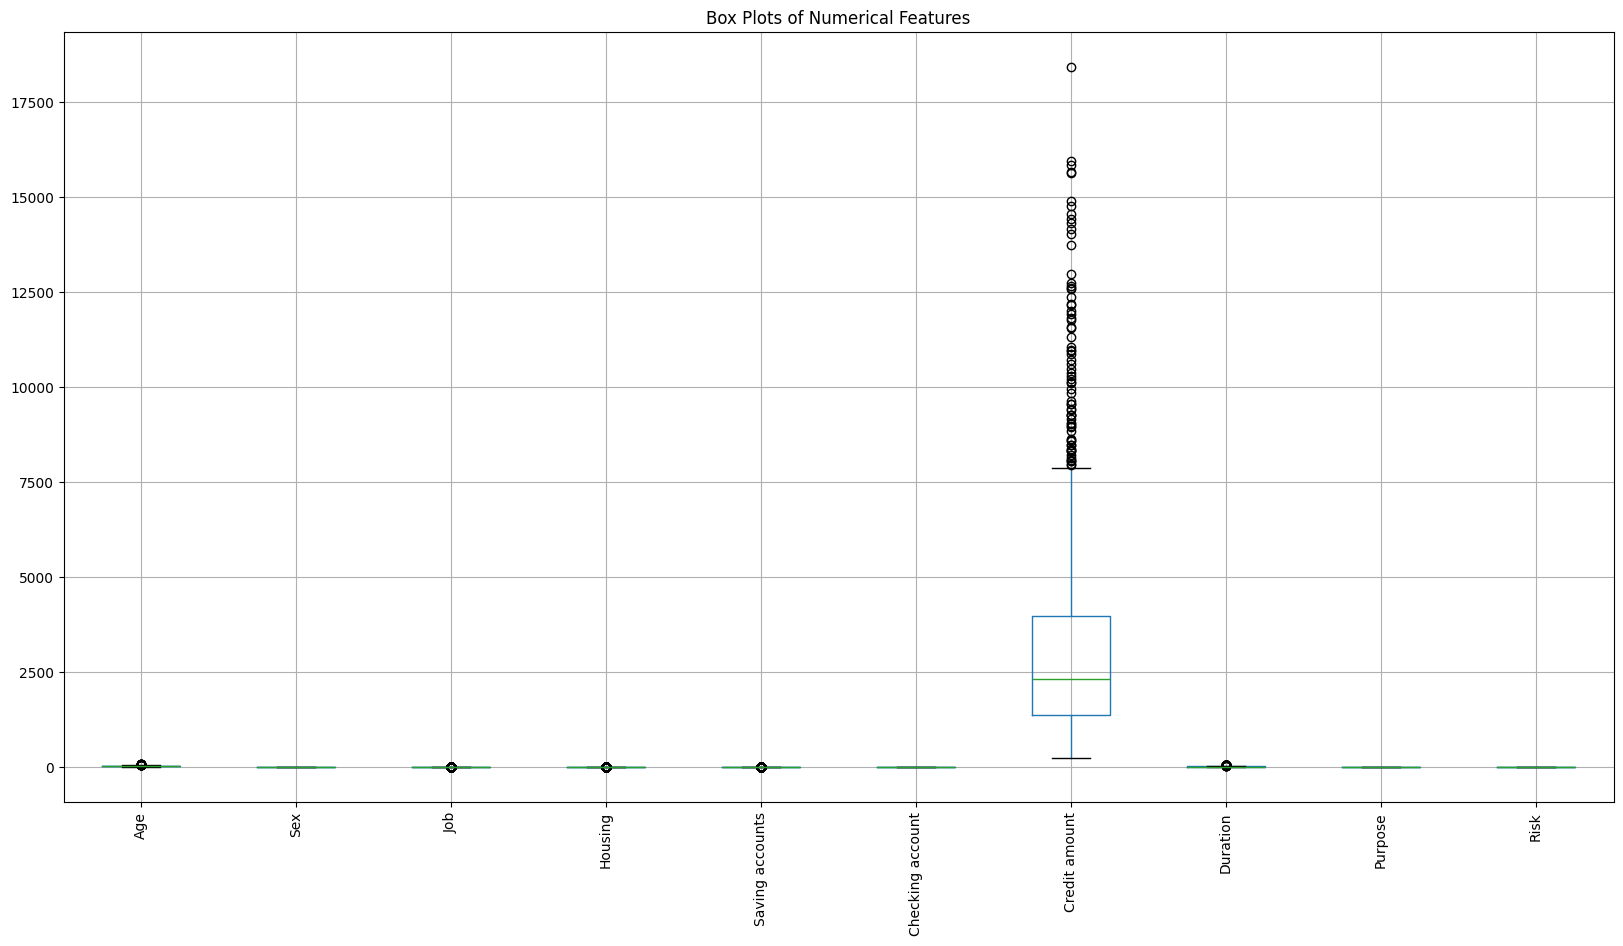

In [ ]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

the records above 15000 are considered as outliers.

after removing outliers


In [ ]:
df = df[df['Credit amount'] <= 15000]
df.info()
df['Risk'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               995 non-null    int64
 1   Sex               995 non-null    int64
 2   Job               995 non-null    int64
 3   Housing           995 non-null    int64
 4   Saving accounts   995 non-null    int64
 5   Checking account  995 non-null    int64
 6   Credit amount     995 non-null    int64
 7   Duration          995 non-null    int64
 8   Purpose           995 non-null    int64
 9   Risk              995 non-null    int64
dtypes: int64(10)
memory usage: 85.5 KB


,count
Risk,
1,698
0,297


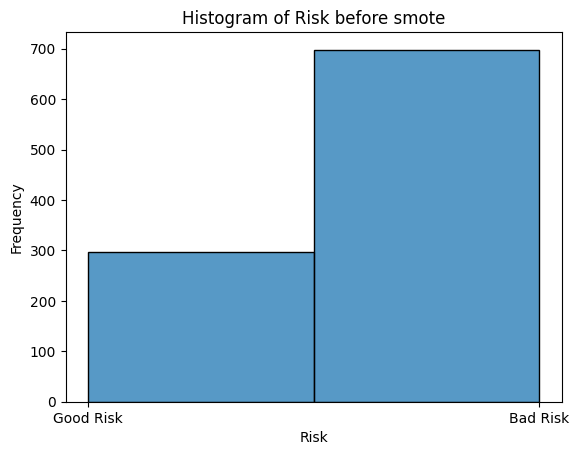

In [ ]:
sns.histplot(df['Risk'], bins=2)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk before smote')
plt.xticks([0, 1], ['Good Risk', 'Bad Risk'])
plt.show()

the target class is unbalanced,so it has to be balanced.we are using smote for balancing the data.

In [ ]:
X = df.drop(columns=['Risk'])
y = df['Risk']
num_risk_0 = len(df[df['Risk'] == 0])

# Calculate the desired number of samples with Risk=0
desired_num_risk_0 = num_risk_0 + 401

# Calculate the sampling strategy for SMOTE
sampling_strategy = {0: desired_num_risk_0}  # Target only Risk=0 class

# Apply SMOTE with the calculated sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with balanced classes
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Risk'] = y_resampled


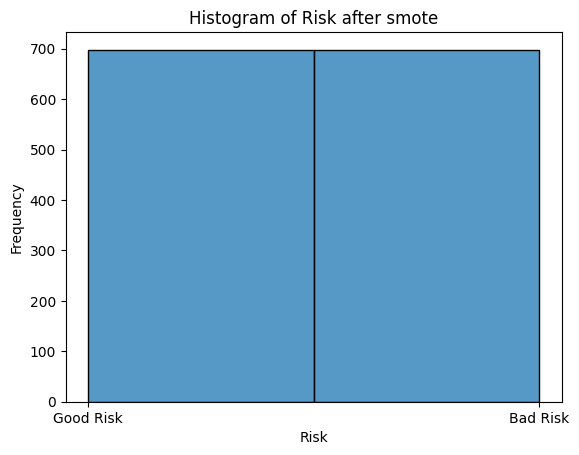

In [ ]:
sns.histplot(balanced_df['Risk'], bins=2)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk after smote')
plt.xticks([0, 1], ['Good Risk', 'Bad Risk'])
plt.show()

now the data is balanced.

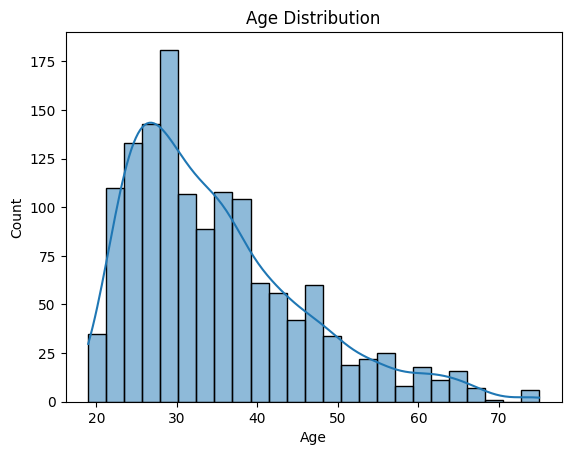

In [ ]:
# Age distribution
sns.histplot(balanced_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

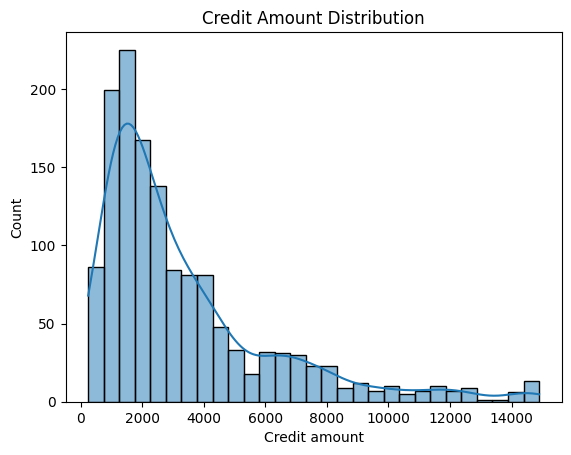

In [ ]:
# Credit amount distribution
sns.histplot(balanced_df['Credit amount'], kde=True)
plt.title('Credit Amount Distribution')
plt.show()



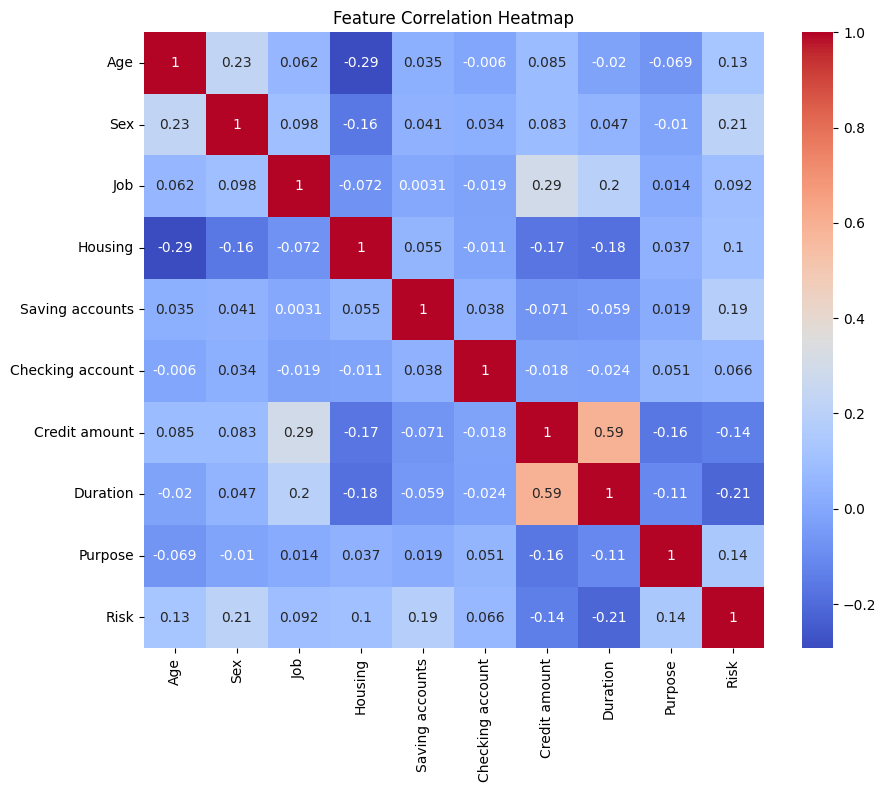

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
balanced_df[['Age', 'Credit amount', 'Duration']].describe()

,Age,Credit amount,Duration
count,1396.00000,1396.000000,1396.00000
mean,34.85745,3357.070917,21.65043
std,10.82777,2896.339324,11.80934
min,19.00000,250.000000,4.00000
25%,27.00000,1344.000000,12.00000
50%,32.00000,2326.000000,19.00000
75%,40.00000,4226.000000,27.00000
max,75.00000,14896.000000,72.00000


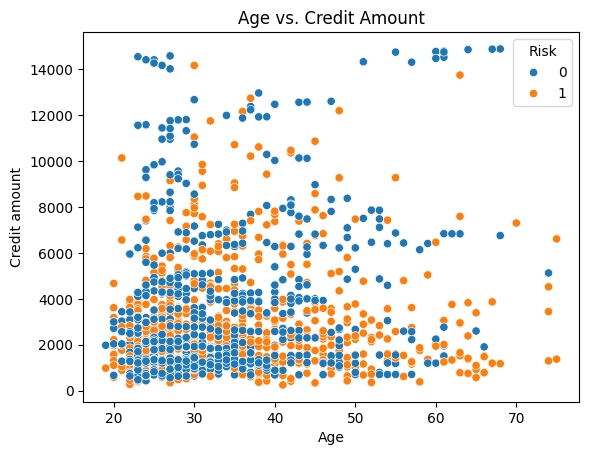

In [ ]:
sns.scatterplot(x='Age', y='Credit amount', hue='Risk', data=balanced_df)
plt.title('Age vs. Credit Amount')
plt.show()

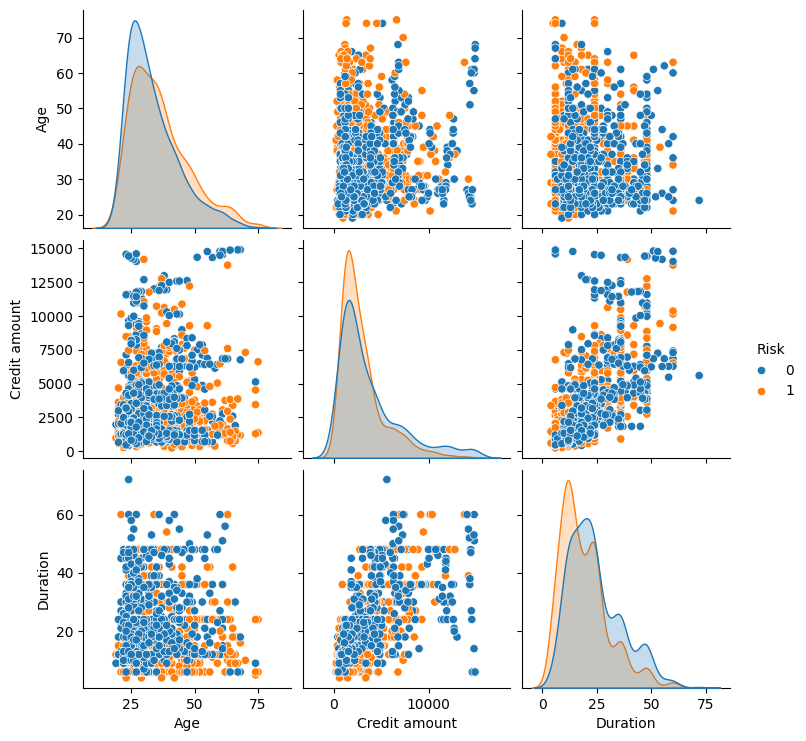

In [ ]:
sns.pairplot(balanced_df[['Age', 'Credit amount', 'Duration', 'Risk']], hue='Risk')
plt.show()

# Model Development

In [ ]:
X = balanced_df.drop(columns=['Risk'])
y = balanced_df['Risk']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


finding best hyperparameters and training

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train the Random Forest classifier with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
print("Best hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")



Accuracy: 0.74
Precision: 0.73
Recall: 0.73
F1-score: 0.73


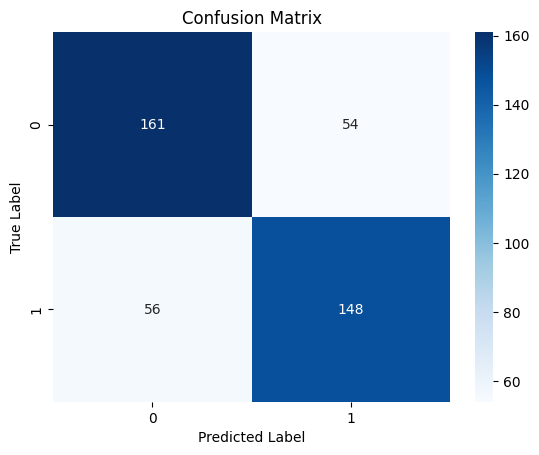

In [ ]:
# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(lencoders, 'lencoders.pkl')
files.download('lencoders.pkl')

joblib.dump(scaler, 'scaler.pkl')
files.download('scaler.pkl')

joblib.dump(best_rf, 'rf_model.pkl')
files.download('rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>